# EDA and modelling of "Telecom Industry Churn Dataset"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

No Null Value in Dataset

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(7043, 21)

No duplicates entries

In [9]:
mask=df['TotalCharges'].str.strip() == ''

In [10]:
df[mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are some entries in TotalCharges which are empty do droping such rows.

In [11]:
df.drop(index=df[mask].index,inplace=True)

Changing the datatype of TotalCharge column to float 

In [12]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Boxplots and Outliers

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Box plot of TotalCharges')

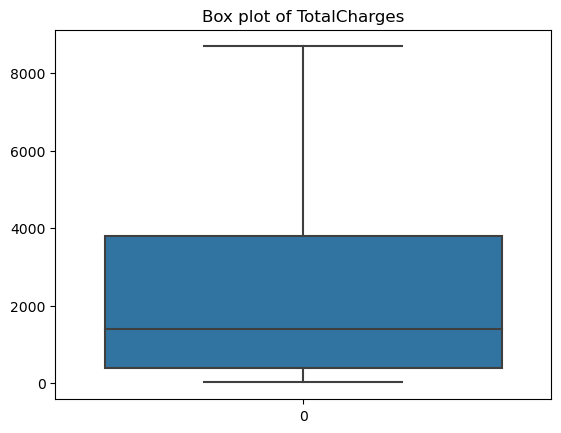

In [14]:
print(sns.boxplot(data=df["TotalCharges"]))
plt.title("Box plot of TotalCharges")

Text(0.5, 1.0, 'Box plot of Tenure')

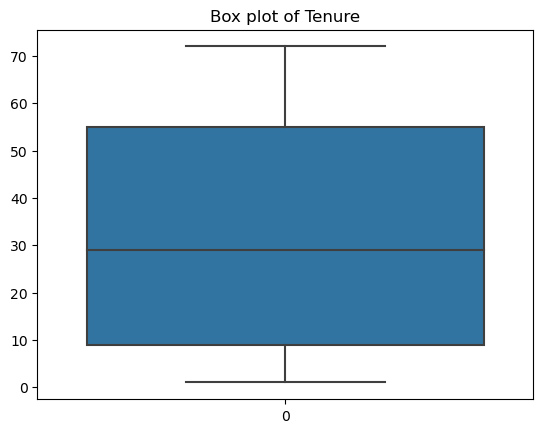

In [15]:
sns.boxplot(data=df["tenure"])
plt.title("Box plot of Tenure")

Text(0.5, 1.0, 'Box plot of MonthlyCharges')

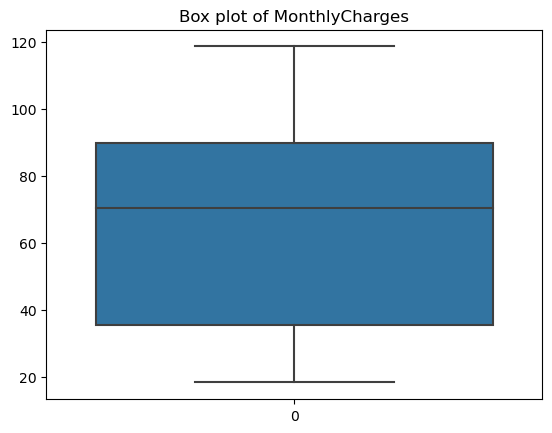

In [16]:
sns.boxplot(data=df["MonthlyCharges"])
plt.title("Box plot of MonthlyCharges")

In [17]:
for f in ["tenure","MonthlyCharges","TotalCharges"]:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    iqr = q3-q1
    
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    
    outliers=df[(df[f]>upper_bound)|(df[f]<lower_bound)]
    print(f,': ',outliers[f].count() ,' outliers')

tenure :  0  outliers
MonthlyCharges :  0  outliers
TotalCharges :  0  outliers


No Outliers exist which can also be seen from boxplots

# Data Visualization

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='TotalCharges'>

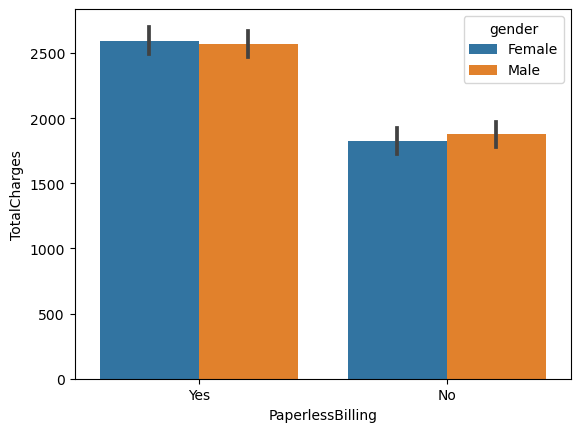

In [18]:
sns.barplot(df.PaperlessBilling,df.TotalCharges,hue=df['gender'])

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

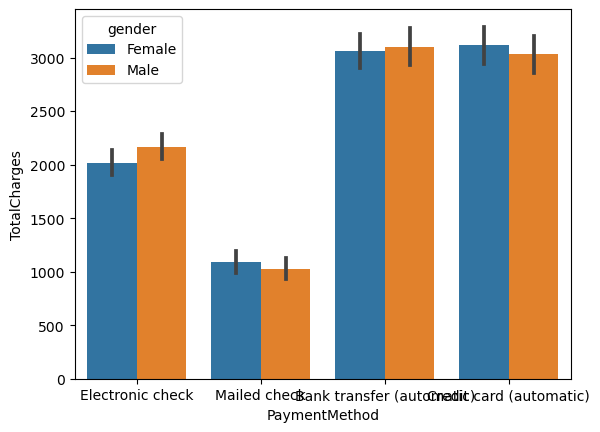

In [19]:
sns.barplot(df.PaymentMethod,df.TotalCharges,hue=df.gender)

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='tenure'>

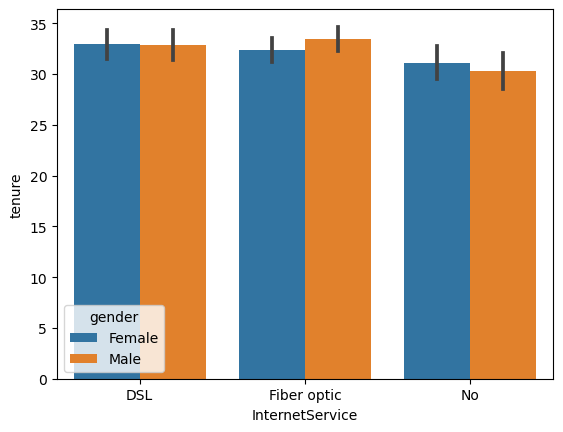

In [20]:
sns.barplot(df.InternetService,df.tenure,df.gender)

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='tenure'>

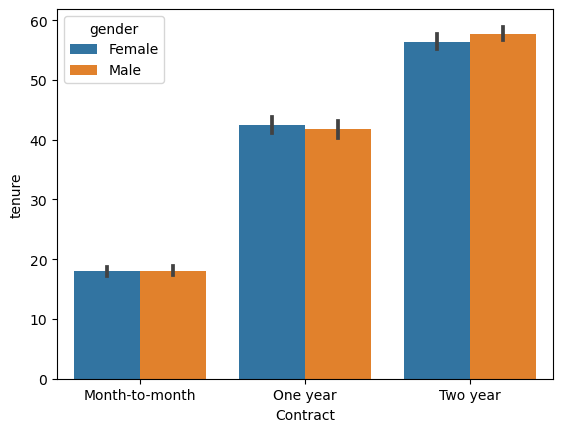

In [21]:
sns.barplot(df.Contract,df.tenure,df.gender)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

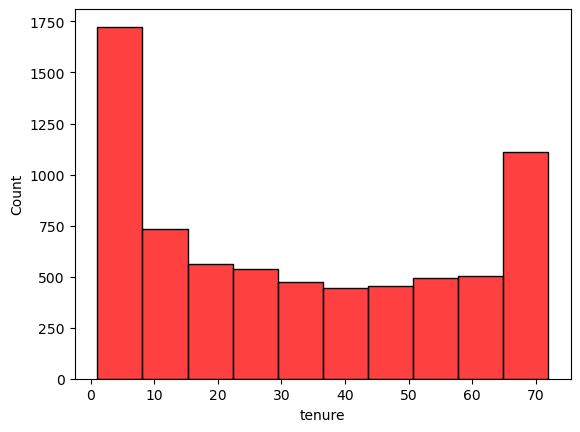

In [22]:
sns.histplot(df.sort_values(by='tenure').tenure,bins=10,color='red')

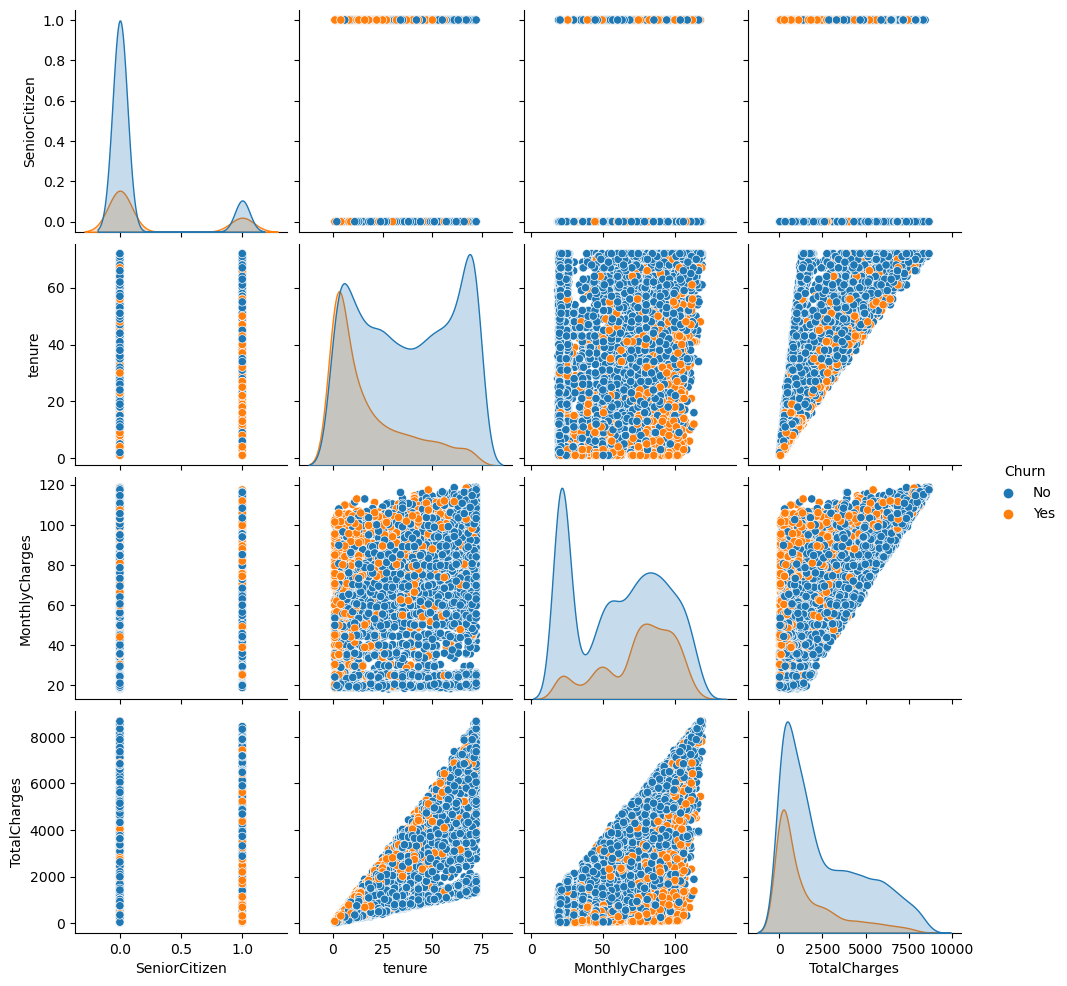

In [23]:
sns.pairplot(df,hue="Churn")

diagonal of the plot is used to plot a histogram of each variable. The off-diagonal plots are used to plot scatterplots of each pair of variables.

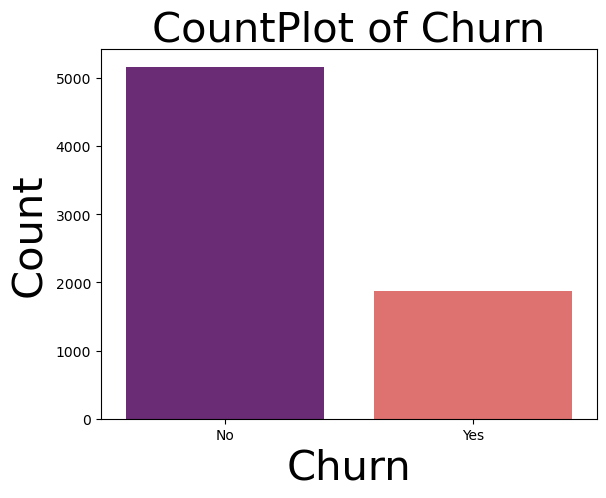

In [24]:
sns.countplot(x="Churn",data= df,palette= "magma")
plt.xlabel("Churn",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("CountPlot of Churn",fontsize=30)
plt.show()

Yes Churn is significantly lower than the No Churn

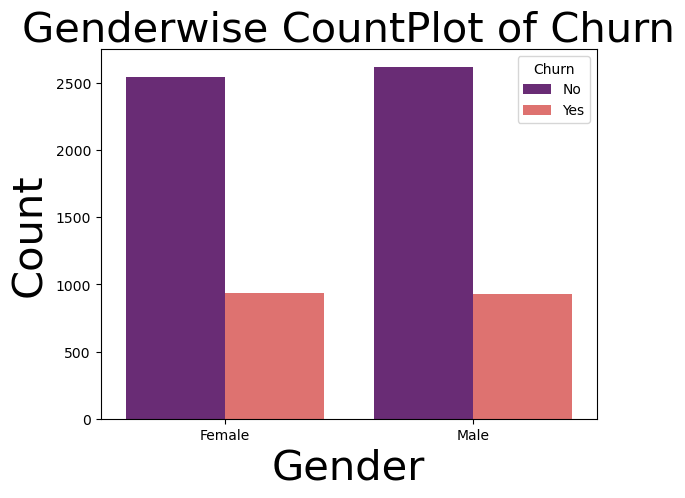

In [25]:
sns.countplot(x="gender",hue="Churn",data= df,palette= "magma")
plt.xlabel("Gender",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("Genderwise CountPlot of Churn",fontsize=30)
plt.show()

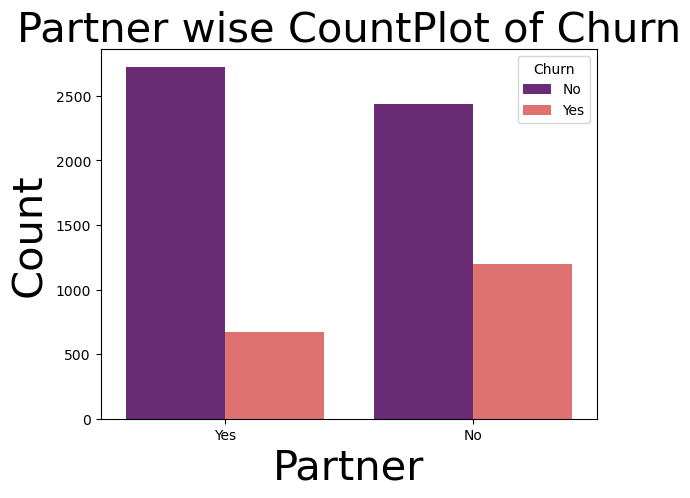

In [26]:
sns.countplot(x="Partner",hue="Churn",data= df,palette= "magma")
plt.xlabel("Partner",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("Partner wise CountPlot of Churn",fontsize=30)
plt.show()

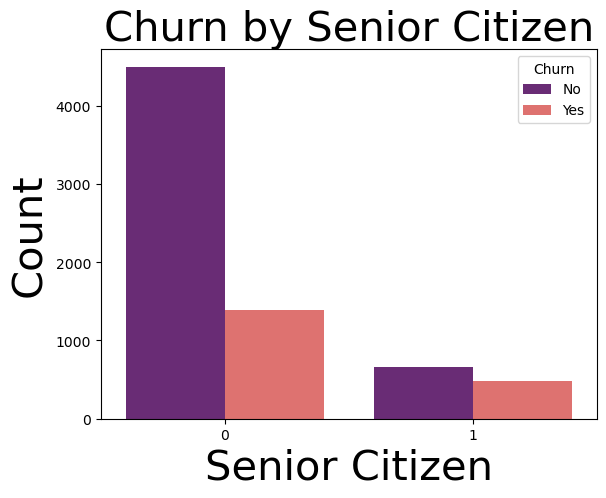

In [27]:
sns.countplot(x="SeniorCitizen",hue="Churn",data= df,palette= "magma")
plt.xlabel("Senior Citizen",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("Churn by Senior Citizen",fontsize=30)
plt.show()

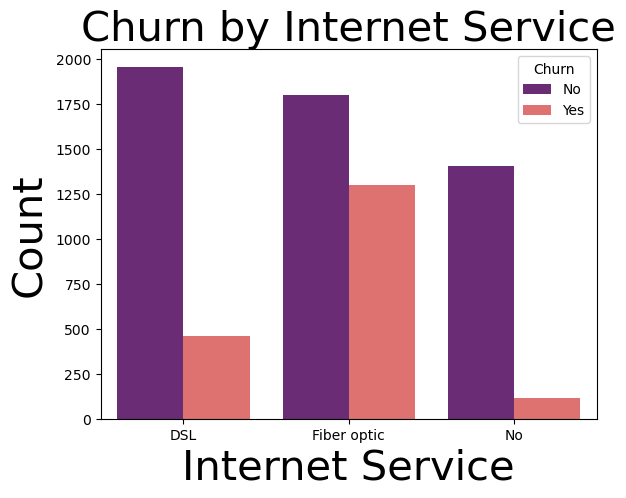

In [28]:
sns.countplot(x="InternetService",hue="Churn",data= df,palette= "magma")
plt.xlabel("Internet Service",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("Churn by Internet Service",fontsize=30)
plt.show()

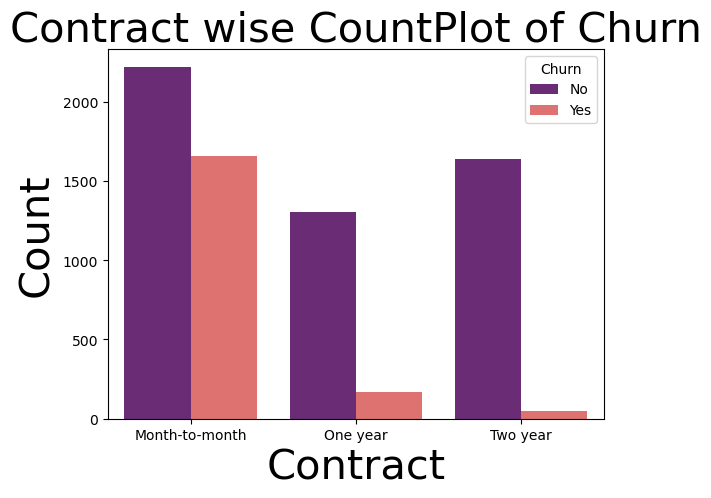

In [29]:
sns.countplot(x="Contract",hue="Churn",data= df,palette= "magma")
plt.xlabel("Contract",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("Contract wise CountPlot of Churn",fontsize=30)
plt.show()

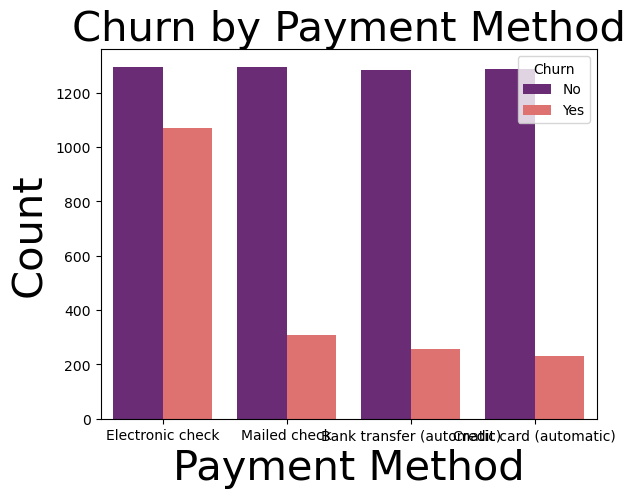

In [30]:
sns.countplot(x="PaymentMethod",hue="Churn",data= df,palette= "magma")
plt.xlabel("Payment Method",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("Churn by Payment Method",fontsize=30)
plt.show()

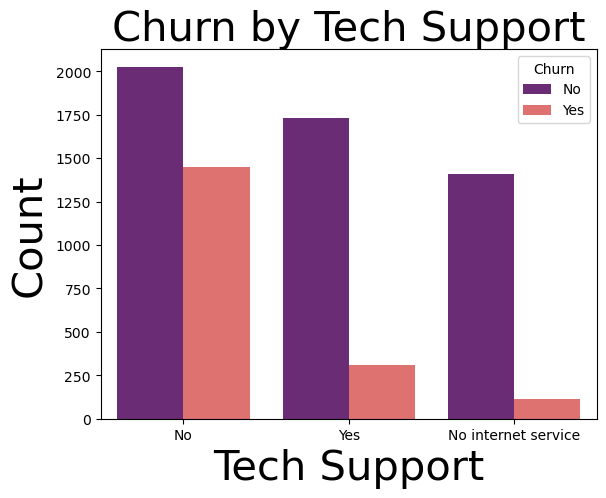

In [31]:
sns.countplot(x="TechSupport",hue="Churn",data= df,palette= "magma")
plt.xlabel("Tech Support",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.title("Churn by Tech Support",fontsize=30)
plt.show()

In [32]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 'Credit card')

In [33]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 'Bank transfer')

In [34]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [35]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [36]:
ds=df.pivot_table(values='TotalCharges',index='PaymentMethod',columns='Contract',aggfunc=sum)
ds

Contract,Month-to-month,One year,Two year
PaymentMethod,,,
Bank transfer,1111708.3,1295385.60,2341186.00
Credit card,980596.2,1336188.15,2354809.00
Electronic check,2721957.8,1337085.70,885859.75
Mailed check,491599.2,498394.05,701398.95


In [37]:
ds.values.flatten()

array([1111708.3 , 1295385.6 , 2341186.  ,  980596.2 , 1336188.15,
       2354809.  , 2721957.8 , 1337085.7 ,  885859.75,  491599.2 ,
        498394.05,  701398.95])

Text(0, 2384809, 'Highest charges collected\nfrom Credit Card\non Two year\ncontract')

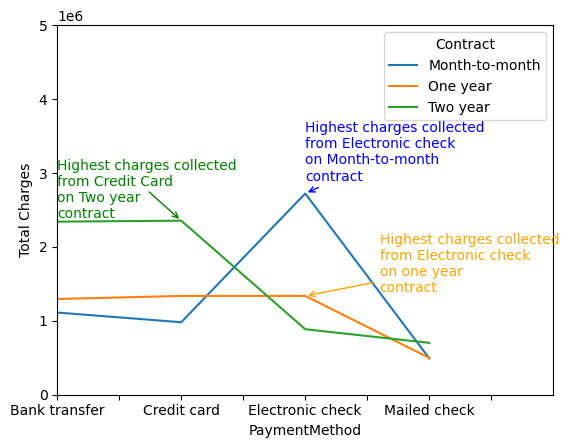

In [38]:
p=ds.plot()
p.set_ylim(0,5e6)
p.set_xlim(0,4)
p.set_ylabel("Total Charges")
p.annotate('Highest charges collected\nfrom Electronic check\non Month-to-month\ncontract', xy=(2,2721957.8), xytext=(2,2898000),
             arrowprops=dict(arrowstyle='->',color='blue'),color='blue')
p.annotate('Highest charges collected\nfrom Electronic check\non one year\ncontract', xy=(2,1337085.70), xytext=(2.6,1387085),
             arrowprops=dict(arrowstyle='->',color='orange'),color='orange')
p.annotate('Highest charges collected\nfrom Credit Card\non Two year\ncontract', xy=(1,2354809.00), xytext=(0,2384809),
             arrowprops=dict(arrowstyle='->',color='green'),color='green')

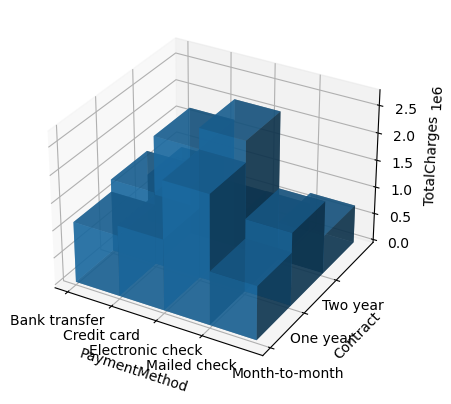

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(range(len(ds.index)), range(len(ds.columns)))

zpos = [0] * (len(ds.index) * len(ds.columns))
dz = ds.values.flatten()

ax.bar3d(xpos.flatten(), ypos.flatten(), zpos, 1, 1, dz, alpha=0.7)

ax.set_xlabel('PaymentMethod')
ax.set_ylabel('Contract')
ax.set_zlabel('TotalCharges')
ax.set_xticks(range(len(ds.index)))
ax.set_xticklabels(ds.index)
ax.set_yticks(range(len(ds.columns)))
ax.set_yticklabels(ds.columns)

plt.show()

# One Hot Encoding

In [40]:
col=(["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
          "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
          "Contract","PaperlessBilling","PaymentMethod"])

In [41]:
df1=pd.get_dummies(df, columns=col, drop_first= True)
df1.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [42]:
df1= df1.drop(["customerID"], axis = 1)
df1.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,No,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,No,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,Yes,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
df1["Churn"]=np.where(df1.Churn=="Yes",1,0)

Yes Churn=1,No Churn =0

# Correlation Analysis

<AxesSubplot:>

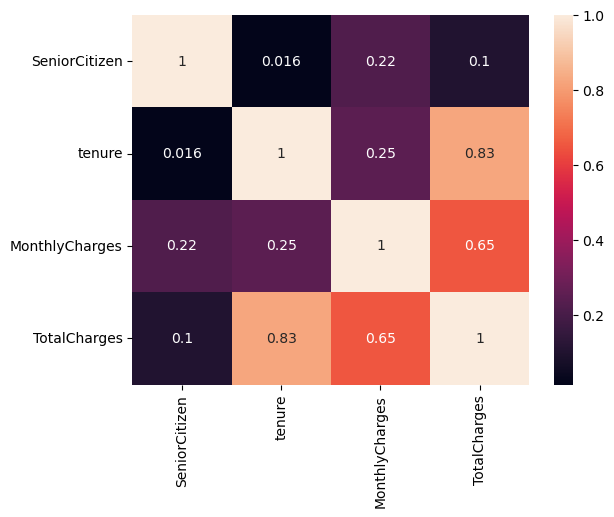

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


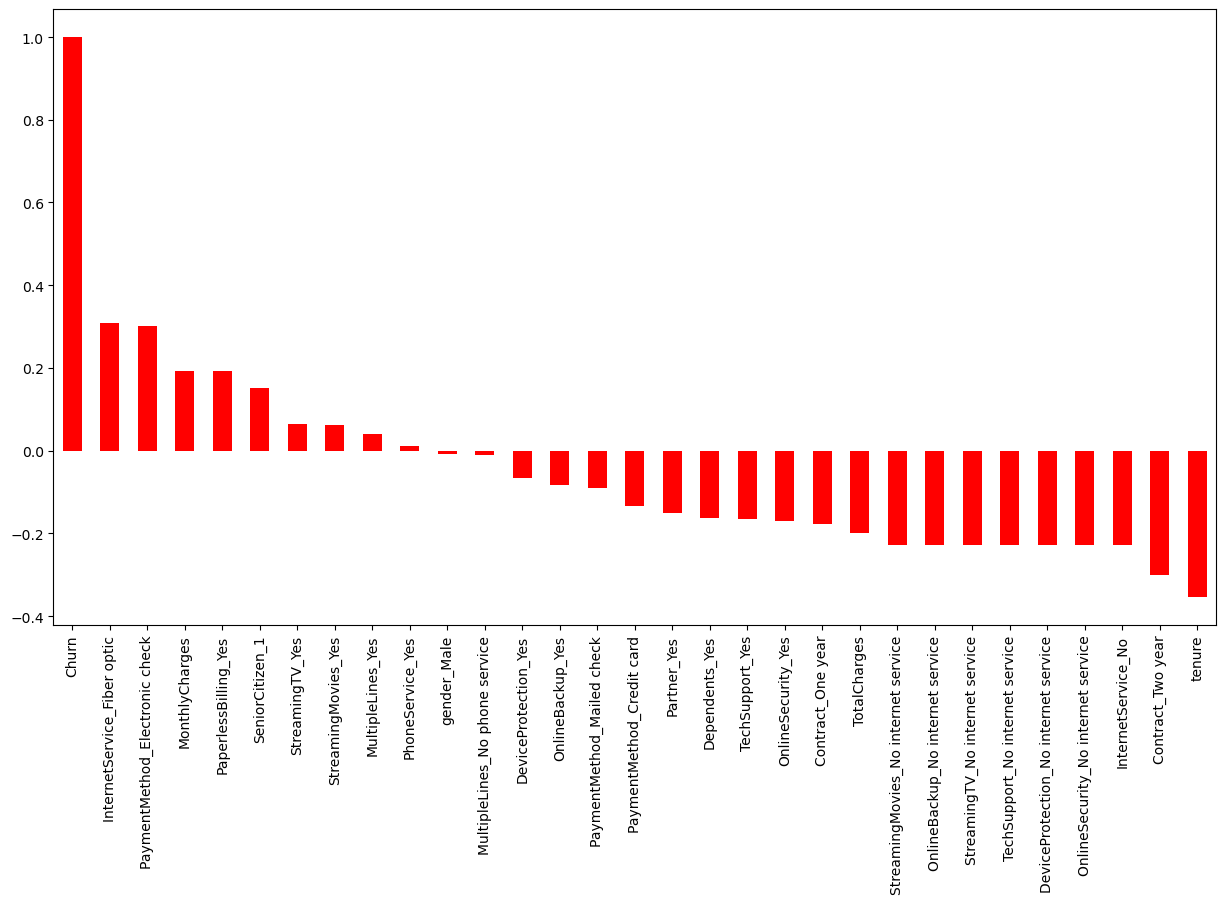

In [46]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color= "red")
plt.show()

<AxesSubplot:>

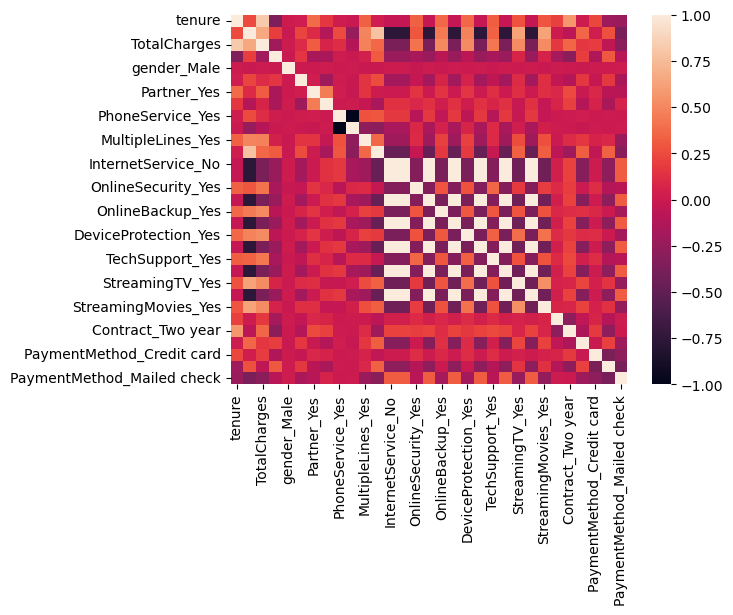

In [47]:
sns.heatmap(df1.corr())

In [48]:
df1.corr()["Churn"]

tenure                                 -0.354049
MonthlyCharges                          0.192858
TotalCharges                           -0.199484
Churn                                   1.000000
gender_Male                            -0.008545
SeniorCitizen_1                         0.150541
Partner_Yes                            -0.149982
Dependents_Yes                         -0.163128
PhoneService_Yes                        0.011691
MultipleLines_No phone service         -0.011691
MultipleLines_Yes                       0.040033
InternetService_Fiber optic             0.307463
InternetService_No                     -0.227578
OnlineSecurity_No internet service     -0.227578
OnlineSecurity_Yes                     -0.171270
OnlineBackup_No internet service       -0.227578
OnlineBackup_Yes                       -0.082307
DeviceProtection_No internet service   -0.227578
DeviceProtection_Yes                   -0.066193
TechSupport_No internet service        -0.227578
TechSupport_Yes     

Normalization does not bring any significant changes in the accuracy of prediction models

# Spliting data into training and test dataset

Spliting data into x array that contains the features to train and a y array with the target variable.
Spliting data into a training set and a testing set. 
Training out model on the training set and then use the test set to evaluate the model.

In [49]:
x=df1.drop(["Churn"], axis =1)
y=df1["Churn"]

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.3,random_state= 1)

# Data Balancing

In [51]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state= 42)
x_res,y_res =ros.fit_resample(x,y)
from collections import Counter
print('Original Dataset shape{}'.format(Counter(y)))
print("Resampled datset shape{}".format(Counter(y_res)))

Original Dataset shapeCounter({0: 5163, 1: 1869})
Resampled datset shapeCounter({0: 5163, 1: 5163})


In [52]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_res, y_res,test_size=0.3,random_state=1)

# Modelling

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# K-Nearest Neighbors (KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
ln=KNeighborsClassifier(n_neighbors=3)
ln.fit(xr_train,yr_train)
yr_pred=ln.predict(xr_test)

print(classification_report(yr_test,yr_pred))
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1574
           1       0.73      0.86      0.79      1524

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098

Confusion Matrix: 
[[1088  486]
 [ 220 1304]]


Accuracy Score:  77.21110393802452


# Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xr_train,yr_train)
yr_pred=dt.predict(xr_test)

print(classification_report(yr_test,yr_pred))
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1574
           1       0.81      0.93      0.87      1524

    accuracy                           0.86      3098
   macro avg       0.87      0.86      0.86      3098
weighted avg       0.87      0.86      0.86      3098

Confusion Matrix: 
[[1249  325]
 [ 102 1422]]


Accuracy Score:  86.21691413815364


# Random forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=700)
rf.fit(xr_train,yr_train)
yr_pred=rf.predict(xr_test)

print(classification_report(yr_test,yr_pred))
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1574
           1       0.85      0.94      0.89      1524

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098

Confusion Matrix: 
[[1312  262]
 [  90 1434]]


Accuracy Score:  88.63783085861846


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xr_train,yr_train)
yr_pred=lr.predict(xr_test)
print(classification_report(yr_test,yr_pred))

print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1574
           1       0.75      0.79      0.77      1524

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

Confusion Matrix: 
[[1176  398]
 [ 319 1205]]


Accuracy Score:  76.85603615235635


C:\Users\utkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machine

In [58]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xr_train,yr_train)
yr_pred=svm.predict(xr_test)

print(classification_report(yr_test,yr_pred))
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1574
           1       0.67      0.61      0.63      1524

    accuracy                           0.66      3098
   macro avg       0.66      0.66      0.65      3098
weighted avg       0.66      0.66      0.66      3098

Confusion Matrix: 
[[1109  465]
 [ 600  924]]


Accuracy Score:  65.62298256939961


# Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xr_train, yr_train)
yr_pred = nb.predict(xr_test)

print(classification_report(yr_test,yr_pred))
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

              precision    recall  f1-score   support

           0       0.85      0.57      0.68      1574
           1       0.67      0.90      0.77      1524

    accuracy                           0.73      3098
   macro avg       0.76      0.73      0.72      3098
weighted avg       0.76      0.73      0.72      3098

Confusion Matrix: 
[[ 892  682]
 [ 157 1367]]


Accuracy Score:  72.91801162040026


# Testing Model

In [60]:
a=np.array(yr_test)
b=np.array(rf.predict(xr_test))
df2=pd.DataFrame({"Original":a, "Predicted": b}, index= range(len(a)))
df2.head(30)

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1
